In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Build a model

In [35]:
from tensorflow.keras.models import Model

base_model = tf.keras.applications.VGG16(weights='imagenet')
activation_model = Model(inputs=base_model.inputs, outputs=base_model.layers[1].output)

553476096/553467096 [==============================] - 4s 0us/step


In [36]:
cat_in_snow  = tf.keras.utils.get_file(
    '320px-Felis_catus-cat_on_snow.jpg',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/320px-Felis_catus-cat_on_snow.jpg')

image_string = open(cat_in_snow, 'rb').read()
image = tf.io.decode_jpeg(image_string)
image = tf.image.resize(image, (224, 224))

image.shape

TensorShape([224, 224, 3])

In [37]:
image = tf.expand_dims(image, axis=0)
image /= 255.

In [39]:
activation = activation_model(image)
activation.shape

TensorShape([1, 224, 224, 64])

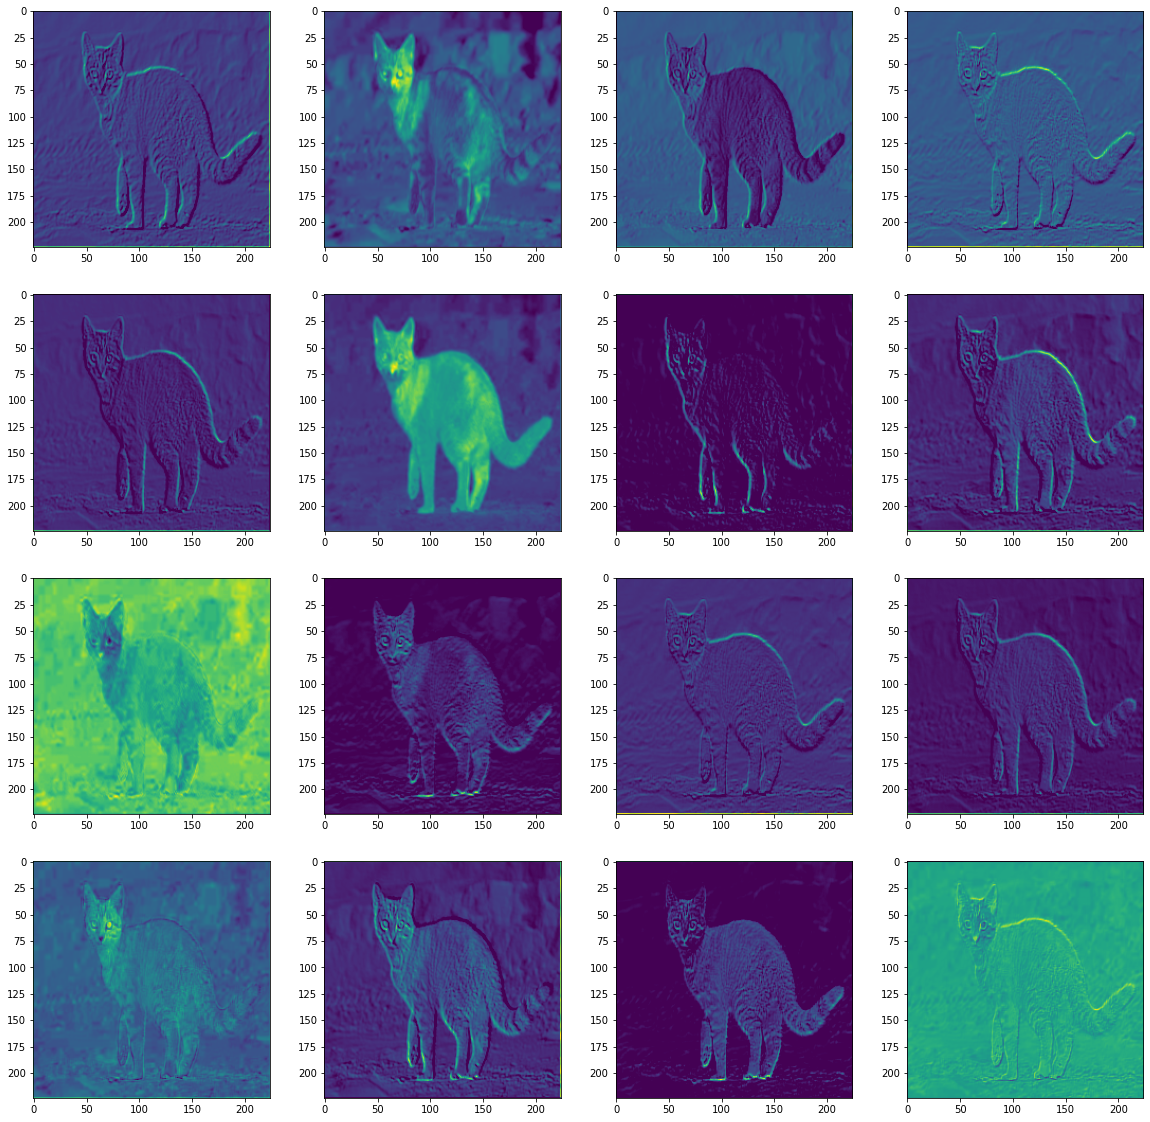

In [40]:
plt.figure(figsize=(20,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(activation[0,:,:,i])
plt.show()